# Minimal example using Tensorflow2.0

### Import relevant libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data Generation

In [6]:
observations = 1000
#To get 1000 random number we will use
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

#For building the matrix of 1000*2 using two variable xs and ZS-
generated_inputs = np.column_stack((xs,zs))

generated_noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + generated_noise
np.savez('TF_intro',inputs = generated_inputs, targets = generated_targets)  # savew n-dimensional array in .npz (numpy) format

### Solving with tensorflow

In [7]:
training_data = np.load('TF_intro.npz')

In [15]:
input_size = 2
output_size =1

#we need to build the model
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 28.8834
Epoch 2/100
32/32 - 0s - loss: 1.1828
Epoch 3/100
32/32 - 0s - loss: 0.4418
Epoch 4/100
32/32 - 0s - loss: 0.3786
Epoch 5/100
32/32 - 0s - loss: 0.3838
Epoch 6/100
32/32 - 0s - loss: 0.4027
Epoch 7/100
32/32 - 0s - loss: 0.3493
Epoch 8/100
32/32 - 0s - loss: 0.4922
Epoch 9/100
32/32 - 0s - loss: 0.3900
Epoch 10/100
32/32 - 0s - loss: 0.3712
Epoch 11/100
32/32 - 0s - loss: 0.3528
Epoch 12/100
32/32 - 0s - loss: 0.3525
Epoch 13/100
32/32 - 0s - loss: 0.3536
Epoch 14/100
32/32 - 0s - loss: 0.3810
Epoch 15/100
32/32 - 0s - loss: 0.3576
Epoch 16/100
32/32 - 0s - loss: 0.3676
Epoch 17/100
32/32 - 0s - loss: 0.3651
Epoch 18/100
32/32 - 0s - loss: 0.3595
Epoch 19/100
32/32 - 0s - loss: 0.3894
Epoch 20/100
32/32 - 0s - loss: 0.3745
Epoch 21/100
32/32 - 0s - loss: 0.3866
Epoch 22/100
32/32 - 0s - loss: 0.4259
Epoch 23/100
32/32 - 0s - loss: 0.3626
Epoch 24/100
32/32 - 0s - loss: 0.3550
Epoch 25/100
32/32 - 0s - loss: 0.3709
Epoch 26/100
32/32 - 0s - loss: 0

## Extract the weights and bias

In [16]:
model.layers[0].get_weights()

[array([[ 2.0128314],
        [-3.0571773]], dtype=float32),
 array([5.00721], dtype=float32)]

In [17]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0128314],
       [-3.0571773]], dtype=float32)

In [19]:
bias = model.layers[0].get_weights()[1]
bias

array([5.00721], dtype=float32)

## Extract the outputs (make predictions)

In [20]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-32.6],
       [ -1.6],
       [ -2.5],
       [ 23. ],
       [ -2.8],
       [-28.6],
       [ 47. ],
       [ 17.1],
       [ 16.7],
       [ 23.2],
       [ -4.5],
       [  0.2],
       [ -4.2],
       [-10. ],
       [ 13.1],
       [ 42.1],
       [ 37.8],
       [ 20.4],
       [ 12. ],
       [ -2.5],
       [-34.3],
       [ 12. ],
       [ -1.8],
       [-13.1],
       [  1.9],
       [  6.5],
       [-43.2],
       [-18.1],
       [-31.2],
       [-12.4],
       [ 16.4],
       [ 31.7],
       [-28.1],
       [ 33.7],
       [  6.8],
       [  7.4],
       [-19.4],
       [ 14.3],
       [  2.9],
       [ 17.3],
       [-23.1],
       [-25.9],
       [ -2.7],
       [ -3.6],
       [ 15.1],
       [ 18.1],
       [-34.3],
       [-13.2],
       [ -6.3],
       [-25.3],
       [-10.8],
       [ 26. ],
       [-22.8],
       [ 31.8],
       [ -5. ],
       [ 37.8],
       [-14.9],
       [-21. ],
       [ 12.3],
       [ -8.6],
       [  5.4],
       [ -6. ],
       [

In [21]:
training_data['targets'].round(1)

array([[-31.5],
       [ -1.7],
       [ -2. ],
       [ 21.9],
       [ -2.3],
       [-28.6],
       [ 46.7],
       [ 15.9],
       [ 16.4],
       [ 23.6],
       [ -3.6],
       [  0.9],
       [ -4.5],
       [ -9.7],
       [ 12.9],
       [ 42.4],
       [ 37. ],
       [ 20.2],
       [ 11. ],
       [ -3. ],
       [-33.5],
       [ 11.9],
       [ -1.2],
       [-13. ],
       [  1. ],
       [  6. ],
       [-42.7],
       [-16.9],
       [-30.5],
       [-11.2],
       [ 17.3],
       [ 31.6],
       [-27.8],
       [ 32.7],
       [  7.6],
       [  7.8],
       [-18.6],
       [ 14.2],
       [  2.8],
       [ 16.9],
       [-21.9],
       [-25.3],
       [ -2.7],
       [ -4.1],
       [ 14.3],
       [ 18.5],
       [-33.5],
       [-12. ],
       [ -6.2],
       [-24.1],
       [ -9.7],
       [ 25.3],
       [-22.5],
       [ 31.3],
       [ -4.6],
       [ 37.9],
       [-15.5],
       [-20.5],
       [ 13. ],
       [ -7.9],
       [  6.1],
       [ -5.3],
       [

## Plotting the data

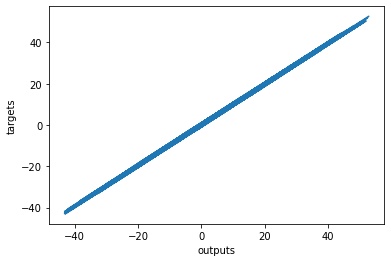

In [22]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()